In [48]:
# Make all necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Analyze the data

In [49]:
# Look at the data
df = pd.read_csv('../data/sorted/match_team_player_play.csv',parse_dates=['game_date'])
df.head(3)

,match_id,game_date,team_name,team_id,home_team_id,away_team_id,home_team_won,home_team_score,away_team_score,clock,...,player,play_id,key_play_id,playtype_id,events,goal_scored,fieldpositionX,fieldPositionY,fieldPosition2X,fieldPosition2Y
0,704279,2024-08-16 19:00:00,Manchester United,360,360,370,True,1,0,1',...,Casemiro,43556204,NaN,68,Casemiro Offside,NaN,0.770,0.736,0.832,0.047
1,704279,2024-08-16 19:00:00,Manchester United,360,360,370,True,1,0,10',...,Harry Maguire,43556283,NaN,66,Harry Maguire Foul,NaN,0.804,0.318,0.000,0.000
2,704279,2024-08-16 19:00:00,Fulham,370,360,370,True,1,0,13',...,Andreas Pereira,43556314,NaN,106,Kenny Tete Shot On Target,NaN,0.546,0.499,0.046,0.505


In [50]:
# Are there many null values?
df.isnull().sum()

match_id               0
game_date              0
team_name              0
team_id                0
home_team_id           0
away_team_id           0
home_team_won          0
home_team_score        0
away_team_score        0
clock                  1
seconds                0
player                 2
play_id                0
key_play_id        12620
playtype_id            0
events                 0
goal_scored        12620
fieldpositionX         0
fieldPositionY         0
fieldPosition2X        0
fieldPosition2Y        0
dtype: int64

Many null values in:
* key plays because key plays are only a fraction of all the plays
* goals scored only appear for keyplays, not all plays

In [52]:
# Descriptive statistics focused on mean vs median
desc_stats = df.describe()
desc_stats.loc[["mean","50%"],:]

,match_id,game_date,team_id,home_team_id,away_team_id,home_team_score,away_team_score,seconds,play_id,key_play_id,playtype_id,goal_scored,fieldpositionX,fieldPositionY,fieldPosition2X,fieldPosition2Y
mean,704403.178064,2024-11-20 07:26:28.354800384,365.920595,366.062276,366.009361,1.547006,1.492697,3025.02576,4.420251e+07,4.420188e+07,90.966472,0.282965,0.361635,0.432655,0.052122,0.199894
50%,704402.000000,2024-11-30 15:00:00,367.000000,367.000000,367.000000,1.000000,1.000000,3045.00000,4.430868e+07,4.430920e+07,76.000000,0.000000,0.288000,0.458000,0.000000,0.000000


Most features have similar values between mean and median.
The biggest differences are seen for:
* home_team_score 
* away_team_score

Assumption: There might be more outliers for teams scoring, both at home and away

In [53]:
# Looking at the different data types
df.dtypes

match_id                    int64
game_date          datetime64[ns]
team_name                  object
team_id                     int64
home_team_id                int64
away_team_id                int64
home_team_won                bool
home_team_score             int64
away_team_score             int64
clock                      object
seconds                     int64
player                     object
play_id                     int64
key_play_id               float64
playtype_id                 int64
events                     object
goal_scored               float64
fieldpositionX            float64
fieldPositionY            float64
fieldPosition2X           float64
fieldPosition2Y           float64
dtype: object

game_date might need to be modified to a date type object

play_id, play_type_id, and key_play_id might be more suitable as an object, since they are categorical features


In [54]:
# after parsing the file breaking out new columns for trending date group
df['day'] = df['game_date'].dt.day
df['month'] = df['game_date'].dt.month
df['year'] = df['game_date'].dt.year
df['hour'] = df['game_date'].dt.hour

In [56]:
# Another look at the data
df.head(3)

,match_id,game_date,team_name,team_id,home_team_id,away_team_id,home_team_won,home_team_score,away_team_score,clock,...,events,goal_scored,fieldpositionX,fieldPositionY,fieldPosition2X,fieldPosition2Y,day,month,year,hour
0,704279,2024-08-16 19:00:00,Manchester United,360,360,370,True,1,0,1',...,Casemiro Offside,NaN,0.770,0.736,0.832,0.047,16,8,2024,19
1,704279,2024-08-16 19:00:00,Manchester United,360,360,370,True,1,0,10',...,Harry Maguire Foul,NaN,0.804,0.318,0.000,0.000,16,8,2024,19
2,704279,2024-08-16 19:00:00,Fulham,370,360,370,True,1,0,13',...,Kenny Tete Shot On Target,NaN,0.546,0.499,0.046,0.505,16,8,2024,19


In [57]:
# Look at correlations
corr1 = df.corr(numeric_only=True)
corr1


,match_id,team_id,home_team_id,away_team_id,home_team_won,home_team_score,away_team_score,seconds,play_id,key_play_id,playtype_id,goal_scored,fieldpositionX,fieldPositionY,fieldPosition2X,fieldPosition2Y,day,month,year,hour
match_id,1.000000,-0.024673,-0.001130,-0.026362,-0.054038,0.003712,0.079316,0.001899,0.975526,0.973611,0.001490,0.044749,-0.000785,0.011358,0.007312,0.016822,-0.161331,-0.512311,0.748089,0.344422
team_id,-0.024673,1.000000,0.462742,0.447709,-0.011624,-0.036772,0.004061,-0.007063,-0.025081,0.001838,-0.021127,-0.042316,0.021819,-0.003602,0.012784,-0.008166,0.008277,0.025710,-0.029531,-0.032950
home_team_id,-0.001130,0.462742,1.000000,-0.080829,-0.092438,-0.102221,0.082233,-0.007703,-0.000810,0.020231,-0.014932,-0.007029,0.007803,-0.003459,0.000317,-0.009615,0.035351,0.028285,-0.024682,-0.058098
away_team_id,-0.026362,0.447709,-0.080829,1.000000,0.071874,0.039961,-0.073146,-0.001486,-0.026262,-0.021176,-0.007212,-0.009983,0.021449,0.014936,0.008108,-0.003716,-0.025141,0.017854,-0.022180,0.010205
home_team_won,-0.054038,-0.011624,-0.092438,0.071874,1.000000,0.675198,-0.500289,-0.005543,-0.042375,-0.041523,-0.003515,0.046867,-0.009655,0.000479,-0.000531,0.005896,-0.164578,0.048688,-0.044902,0.088027
home_team_score,0.003712,-0.036772,-0.102221,0.039961,0.675198,1.000000,-0.169261,0.000818,0.013147,0.026655,-0.000334,0.159449,-0.020840,0.002501,-0.006303,0.022102,-0.130375,0.000859,0.010083,0.020891
away_team_score,0.079316,0.004061,0.082233,-0.073146,-0.500289,-0.169261,1.000000,-0.009365,0.076733,0.067753,0.001812,0.131675,-0.019216,-0.005782,-0.008011,0.026118,0.125202,-0.050456,0.058311,-0.018013
seconds,0.001899,-0.007063,-0.007703,-0.001486,-0.005543,0.000818,-0.009365,1.000000,0.003863,-0.008052,-0.019984,-0.410646,-0.131919,-0.152574,-0.046711,-0.068063,-0.001094,-0.007294,0.006399,-0.000492
play_id,0.975526,-0.025081,-0.000810,-0.026262,-0.042375,0.013147,0.076733,0.003863,1.000000,1.000000,0.002032,0.041985,-0.001960,0.010710,0.006046,0.015268,-0.181499,-0.363005,0.632611,0.379602
key_play_id,0.973611,0.001838,0.020231,-0.021176,-0.041523,0.026655,0.067753,-0.008052,1.000000,1.000000,-0.011579,0.041985,0.023918,0.037055,-0.023264,0.040503,-0.191772,-0.369876,0.638277,0.395367


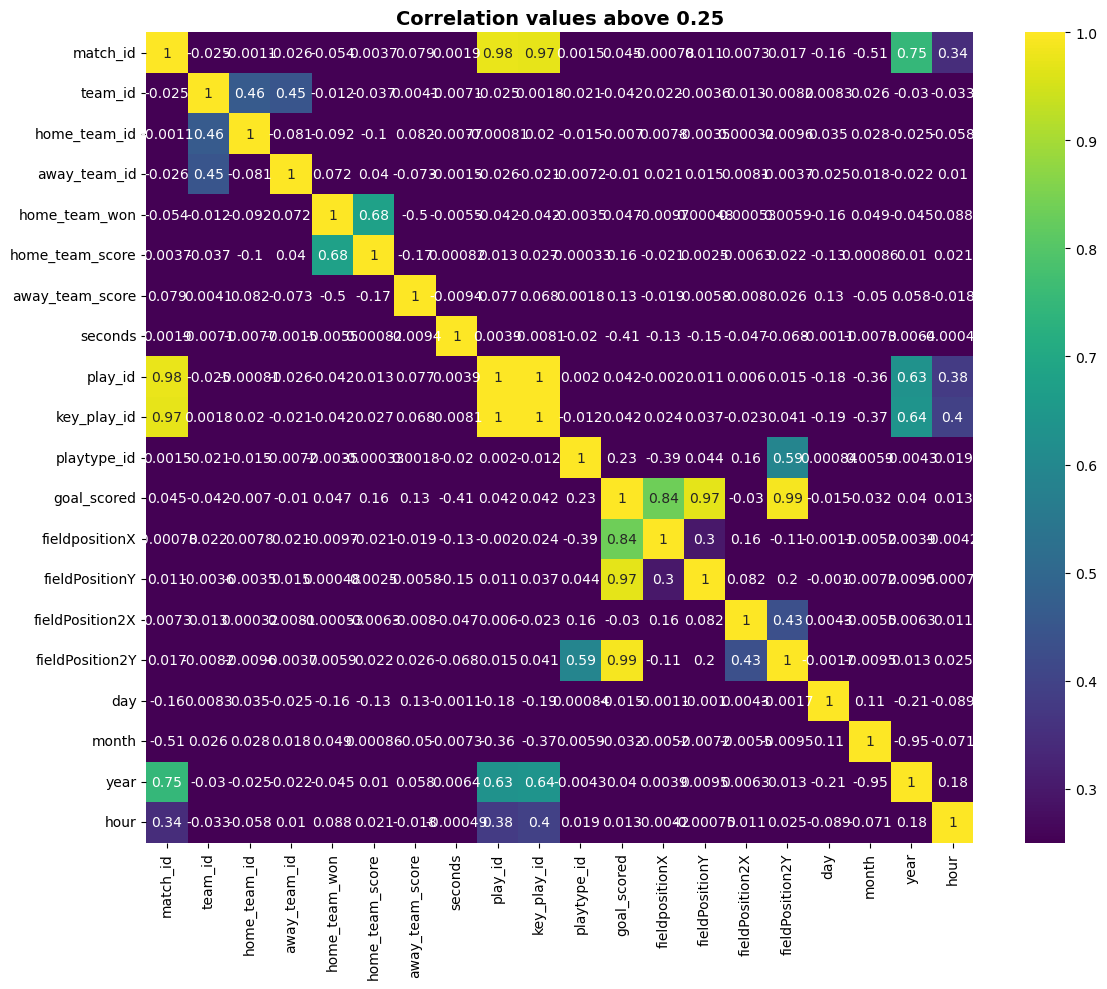

In [58]:
# Heatmap highlighting correlations above 0.25
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr1, cmap='viridis', vmin=0.25, annot=True, ax=ax)
ax.set_title("Correlation values above 0.25", fontsize =14, weight='bold')
plt.tight_layout();

Relevant high positive correlations between:
* home_team_won and home_team_score = 0.68
* goal_scored and fieldpositionX = 0.84
* goal_scored and fieldpositionY = 0.84
* goal_scored and fieldposition2Y = 0.99, not sure what this feature means
* year and key_play_id = 0.63, probably means that later on the year, there are more key plays
* hour and key_play_id = 0.4, probably means that later games have more key plays

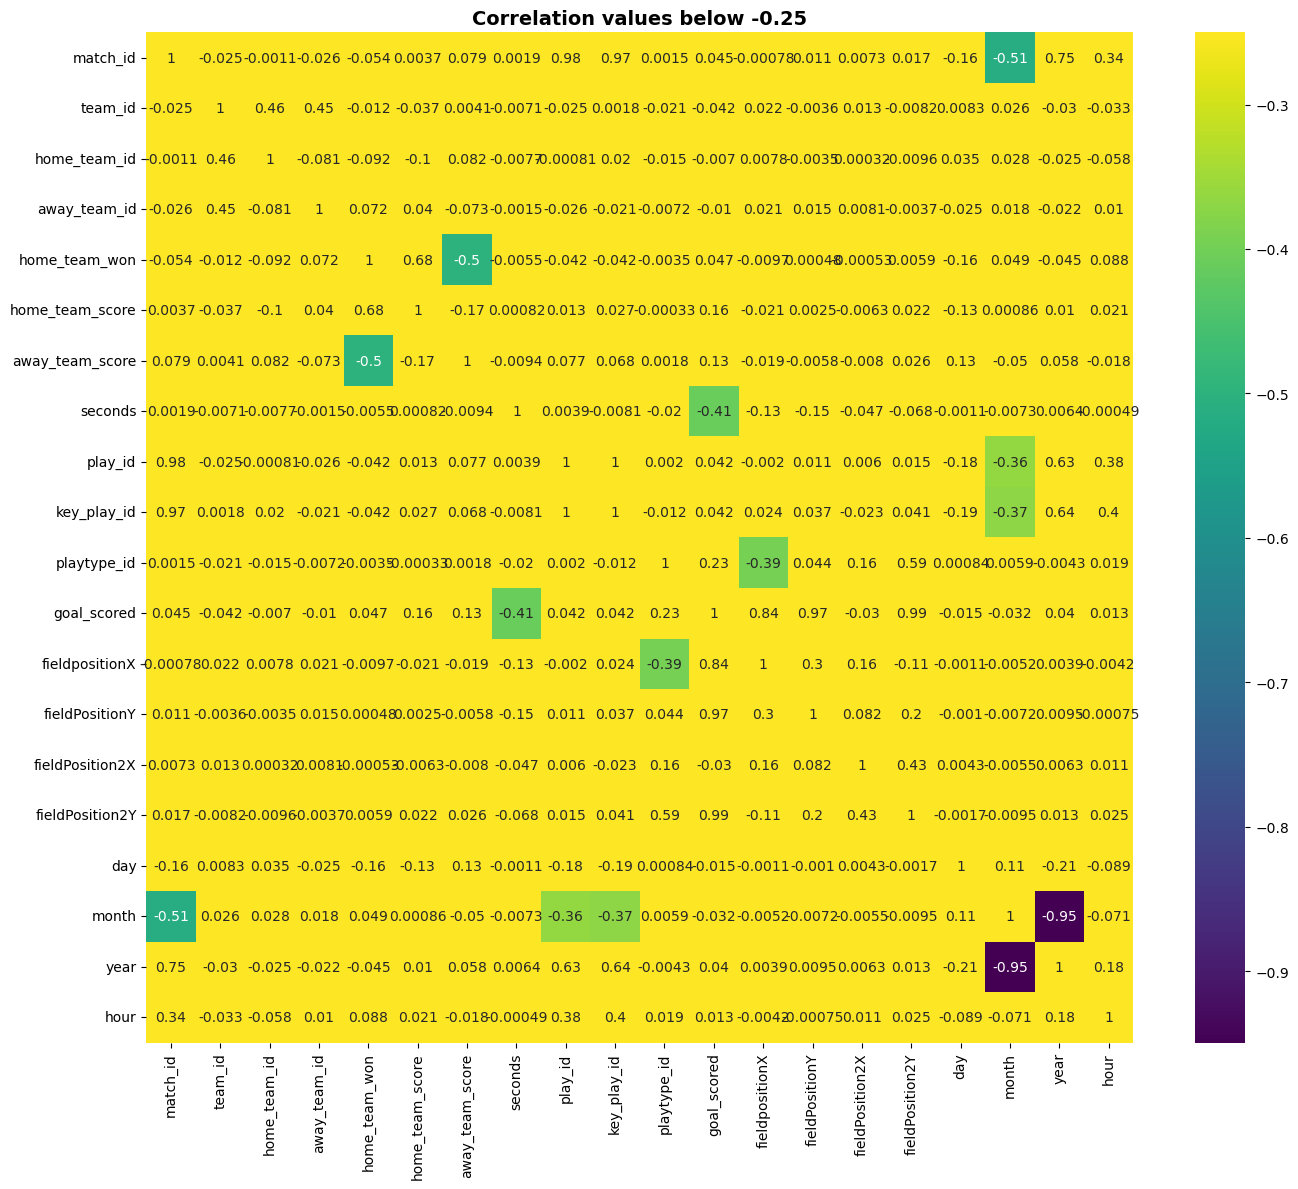

In [61]:
# Heatmap highlighting correlations above 0.25
fig,ax = plt.subplots(figsize=(14,12))
sns.heatmap(corr1, cmap='viridis', vmax=-0.25, annot=True, ax=ax)
ax.set_title("Correlation values below -0.25", fontsize =14, weight='bold')
plt.tight_layout();

Relevant high negative correlations between:
* home_team_won and away_team_score = -0.5
* goal_scored and seconds = -0.41, probably meaning that less goals are scored in the latter parts of the game
* play_type_id and fieldpositionX = -0.39, not sure of the relevance of this correlation
* month and match_id = -0.51, probably means that there are a lot more matches or different matches at the beginning of the year
* month and key_play_id = -0.37, probably means that more key plays happen at the beginning of the year.  


#### Based on all findings so far, the main question is when is the best moment to watch soccer and see the most goals:

##### Data to support this question:
* Focusing only on key plays, which removes of null values. 
* Main outliers are found in home_team_score and away_team_score, which we will be avoiding on this question.
* High positive correlation between: 
    * hour and key_play_id
    * year and key_play_id
    * goal_scored and fieldpositionX
    * goal_scored and fieldpositionY
* High negative correlation between:
    * goal_scored and seconds
    * month and key_play_id


#### This findings should help us answer:
* What part of the season shows that a player is more likely to score a goal?
* What month shows that a player is more likely to score a goal?
* What hour of the day shows that a player is more likely to score a goal?
* What minute of the match shows that a player is more likely to score a goal? 
* What player position shows that a player is more likely to score a goal?


In [76]:
# new dataframe only using our desired columns:
df_scoring = df[["game_date","year","month","day","hour","seconds","team_name","player","key_play_id","playtype_id","goal_scored","fieldpositionX","fieldPositionY"]]
df_scoring.head(3)

,game_date,year,month,day,hour,seconds,team_name,player,key_play_id,playtype_id,goal_scored,fieldpositionX,fieldPositionY
0,2024-08-16 19:00:00,2024,8,16,19,16,Manchester United,Casemiro,NaN,68,NaN,0.770,0.736
1,2024-08-16 19:00:00,2024,8,16,19,560,Manchester United,Harry Maguire,NaN,66,NaN,0.804,0.318
2,2024-08-16 19:00:00,2024,8,16,19,737,Fulham,Andreas Pereira,NaN,106,NaN,0.546,0.499


In [77]:
df_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15062 entries, 0 to 15061
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   game_date       15062 non-null  datetime64[ns]
 1   year            15062 non-null  int32         
 2   month           15062 non-null  int32         
 3   day             15062 non-null  int32         
 4   hour            15062 non-null  int32         
 5   seconds         15062 non-null  int64         
 6   team_name       15062 non-null  object        
 7   player          15060 non-null  object        
 8   key_play_id     2442 non-null   float64       
 9   playtype_id     15062 non-null  int64         
 10  goal_scored     2442 non-null   float64       
 11  fieldpositionX  15062 non-null  float64       
 12  fieldPositionY  15062 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(4), int64(2), object(2)
memory usage: 1.3+ MB


In [ ]:
# remove the big majority of null values so we can only focus on key plays
df_scoring.dropna(axis=0, inplace=True)
df_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 32 to 15056
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   game_date       2442 non-null   datetime64[ns]
 1   year            2442 non-null   int32         
 2   month           2442 non-null   int32         
 3   day             2442 non-null   int32         
 4   hour            2442 non-null   int32         
 5   seconds         2442 non-null   int64         
 6   team_name       2442 non-null   object        
 7   player          2442 non-null   object        
 8   key_play_id     2442 non-null   float64       
 9   playtype_id     2442 non-null   int64         
 10  goal_scored     2442 non-null   float64       
 11  fieldpositionX  2442 non-null   float64       
 12  fieldPositionY  2442 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(4), int64(2), object(2)
memory usage: 228.9+ KB


C:\Users\vchan\AppData\Local\Temp\ipykernel_28772\1049306393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scoring.dropna(axis=0, inplace=True)


In [241]:
# group data only to when a goal was scored
goal_scored = df_scoring[df_scoring["goal_scored"]==1]
goal_scored

,game_date,year,month,day,hour,seconds,team_name,player,key_play_id,playtype_id,goal_scored,fieldpositionX,fieldPositionY
53,2024-08-16 19:00:00,2024,8,16,19,5206,Manchester United,Alejandro Garnacho,43557476.0,173,1.0,0.186,0.561
97,2024-08-17 11:30:00,2024,8,17,11,3566,Liverpool,Diogo Jota,43560255.0,70,1.0,0.196,0.476
100,2024-08-17 11:30:00,2024,8,17,11,3888,Liverpool,Mohamed Salah,43560330.0,70,1.0,0.126,0.551
134,2024-08-17 14:00:00,2024,8,17,14,1471,Arsenal,Bukayo Saka,43561882.0,137,1.0,0.154,0.504
174,2024-08-17 14:00:00,2024,8,17,14,4385,Arsenal,Bukayo Saka,43564303.0,70,1.0,0.262,0.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,2025-02-21 20:00:00,2025,2,21,20,5309,Brentford,Fabio Carvalho,44739884.0,70,1.0,0.186,0.565
15011,2025-02-19 19:30:00,2025,2,19,19,1692,Liverpool,Diogo Jota,44727999.0,70,1.0,0.152,0.532
15017,2025-02-19 19:30:00,2025,2,19,19,2222,Aston Villa,Youri Tielemans,44728051.0,173,1.0,0.142,0.399
15023,2025-02-19 19:30:00,2025,2,19,19,2700,Aston Villa,Lucas Digne,44728135.0,137,1.0,0.166,0.470


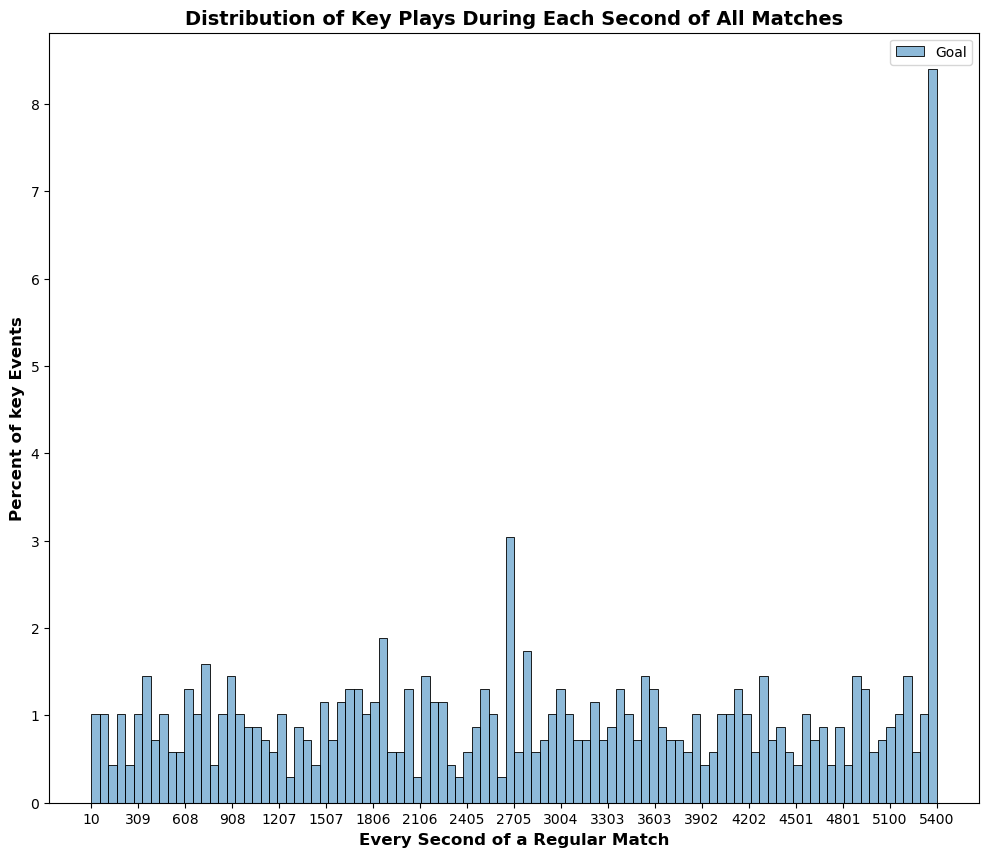

In [242]:
# Histogram of goal scoring distribution during all EPL matches
fig, ax = plt.subplots(figsize=(12, 10))
sns.histplot(data=goal_scored, x="seconds", hue='goal_scored', bins=100, stat='percent', ax=ax)

# generate tick positions
tick_positions = np.linspace(goal_scored["seconds"].min(), goal_scored["seconds"].max(), num=19)
ax.set_xticks(tick_positions)
# change xticklabels to 0 decimal places
ax.set_xticklabels([f"{int(tick)}" for tick in tick_positions])

ax.set_title('Distribution of Key Plays During Each Second of All Matches', fontsize=14, weight='bold')
ax.set_xlabel('Every Second of a Regular Match', fontsize=12, weight='bold')
ax.set_ylabel('Percent of key Events', fontsize=12, weight='bold')
plt.legend(["Goal", "Other Key Plays"])

plt.show()

Now, we know that most goals are happenning around 2705 seconds (45 minute mark), or 5400 seconds (90 minute mark).

It might be best to define bins for each 5 minutes of the game and see how the distribution aligns. 

Also, note that key events are dominating the second half of the games.

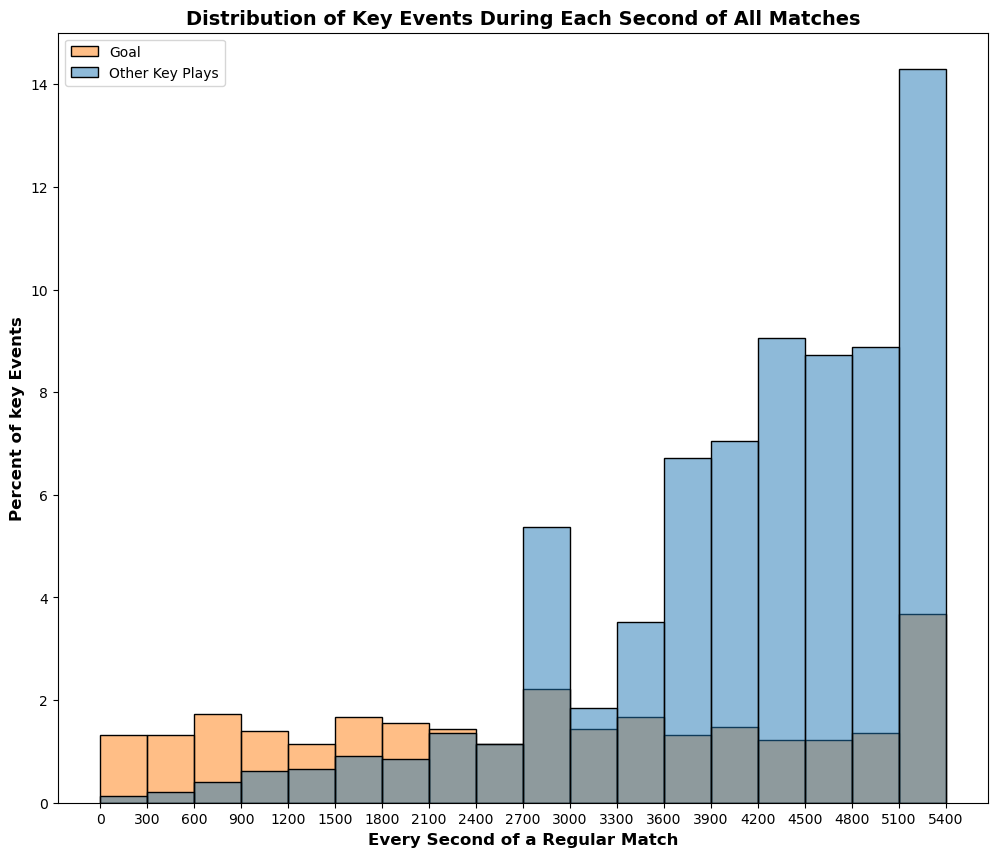

In [235]:
# Histogram of goal scoring distribution during all EPL matches
fig, ax = plt.subplots(figsize=(12, 10))

# set a bin size for 300 seconds or 5 minutes
bin_size = 300
new_bins = np.arange(0,df_scoring["seconds"].max() + bin_size, bin_size)
sns.histplot(data=df_scoring, x="seconds", hue='goal_scored', bins=new_bins, stat='percent', ax=ax)


# generate tick positions
tick_positions = np.arange(0, df_scoring["seconds"].max() + bin_size, bin_size)
ax.set_xticks(tick_positions)
# change xticklabels to 0 decimal places
ax.set_xticklabels([f"{int(tick)}" for tick in tick_positions])

ax.set_title('Distribution of Key Events During Each Second of All Matches', fontsize=14, weight='bold')
ax.set_xlabel('Every Second of a Regular Match', fontsize=12, weight='bold')
ax.set_ylabel('Percent of key Events', fontsize=12, weight='bold')
plt.legend(["Goal", "Other Key Plays"]);

Creating bins, we can better appreciate that almost 4% of all goals have taken place between the last 5 minutes. 

Also, rather than the last 45 minutes of a match, first 5 minutes of the second half (2700-300 seconds) accout for the second highest distribution of just above 2%. 

Now, let's 

In [153]:
# group data by year, month, and day
grouped_scoring = df_scoring.groupby(["year","month"])["goal_scored"].size().reset_index(name='number_of_goals').sort_values(["year","month"])
grouped_scoring

,year,month,number_of_goals
0,2024,8,266
1,2024,9,338
2,2024,10,305
3,2024,11,339
4,2024,12,590
5,2025,1,381
6,2025,2,223


C:\Users\vchan\AppData\Local\Temp\ipykernel_28772\2842832882.py:2: MatplotlibDeprecationWarning: Passing label as a length 2442 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(grouped_scoring.index, grouped_scoring["number_of_goals"], label=df_scoring["month"])
C:\Users\vchan\AppData\Local\Temp\ipykernel_28772\2842832882.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=df_scoring["month"], rotation=90);


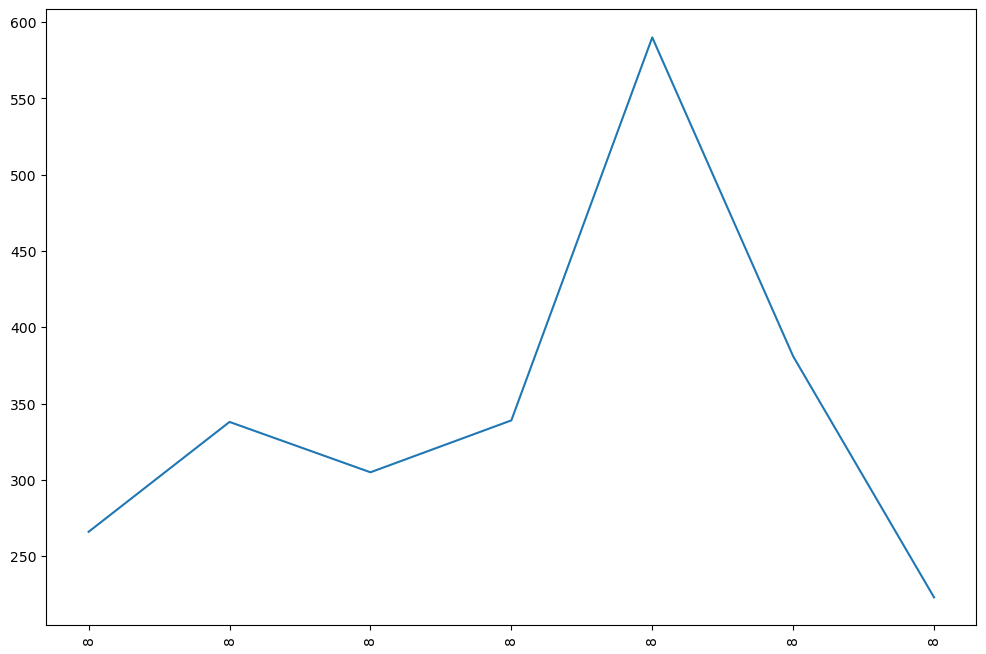

In [157]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(grouped_scoring.index, grouped_scoring["number_of_goals"], label=df_scoring["month"])
ax.set_xticklabels(labels=df_scoring["month"], rotation=90);

In [80]:
# group data only to when a goal was scored
goal_scored = df_scoring[df_scoring["goal_scored"]==1]
goal_scored

,game_date,year,month,day,hour,seconds,team_name,player,key_play_id,playtype_id,goal_scored,fieldpositionX,fieldPositionY
53,2024-08-16 19:00:00,2024,8,16,19,5206,Manchester United,Alejandro Garnacho,43557476.0,173,1.0,0.186,0.561
97,2024-08-17 11:30:00,2024,8,17,11,3566,Liverpool,Diogo Jota,43560255.0,70,1.0,0.196,0.476
100,2024-08-17 11:30:00,2024,8,17,11,3888,Liverpool,Mohamed Salah,43560330.0,70,1.0,0.126,0.551
134,2024-08-17 14:00:00,2024,8,17,14,1471,Arsenal,Bukayo Saka,43561882.0,137,1.0,0.154,0.504
174,2024-08-17 14:00:00,2024,8,17,14,4385,Arsenal,Bukayo Saka,43564303.0,70,1.0,0.262,0.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,2025-02-21 20:00:00,2025,2,21,20,5309,Brentford,Fabio Carvalho,44739884.0,70,1.0,0.186,0.565
15011,2025-02-19 19:30:00,2025,2,19,19,1692,Liverpool,Diogo Jota,44727999.0,70,1.0,0.152,0.532
15017,2025-02-19 19:30:00,2025,2,19,19,2222,Aston Villa,Youri Tielemans,44728051.0,173,1.0,0.142,0.399
15023,2025-02-19 19:30:00,2025,2,19,19,2700,Aston Villa,Lucas Digne,44728135.0,137,1.0,0.166,0.470


C:\Users\vchan\AppData\Local\Temp\ipykernel_28772\3396228293.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=goal_scored["game_date"], rotation=90);


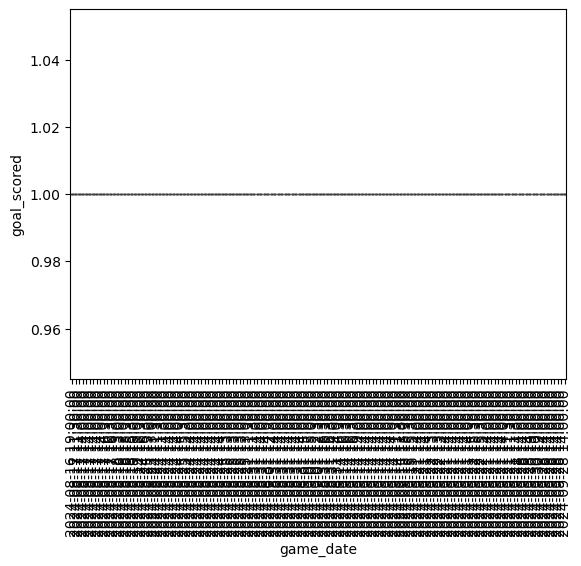

In [ ]:
fig,ax = plt.subplots()
sns.boxplot(data=goal_scored, x='game_date', y='goal_scored', ax=ax)
ax.set_xticklabels(labels=goal_scored["game_date"], rotation=90);